# **DS514/515 Final Project**

# **Title** : **Credit Card Approval Analysis and Predictive Modeling**
# หัวข้อ : การวิเคราะห์และการสร้างแบบจำลองคาดการณ์การอนุมัติบัตรเครดิต


**สมาชิก:**
<br>1) อาทิตย์ บูรณสิงห์ (ID: 68199160309)

<br>
**Dataset:** Credit Card Approvals (Clean Data) <br>
**link Source:** https://www.kaggle.com/datasets/samuelcortinhas/credit-card-approval-clean-data/data



## **Import Packages**

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Library
import numpy as np
import pandas as pd

strPath = "/content/drive/MyDrive/DS514 Data Science/"
print(strPath)

/content/drive/MyDrive/DS514 Data Science/


## **Import Dataset**

In [ ]:
# อ่านข้อมูลจาก File Dataset_Cleaned.csv
df1 = pd.read_csv(strPath + "Dataset_Cleaned.csv",sep=",")
print(df1.shape) # ตรวจสอบขนาด (shape) ของ DataFrame  (Rows, Column) --> (690,18)
df1.head(5) # ดูข้อมูล 5 แถวแรก

(690, 18)


,Gender,Age,Debt,Married,BankCustomer,Industry,Industry_Name,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,StateName,Income,Approved
0,1,30.83,0.000,1,1,1,Industrials,White,1.250,1,1,1,0,ByBirth,202,District of Columbia,0,1
1,1,27.83,1.540,1,1,1,Industrials,White,3.750,1,1,5,1,ByBirth,100,Michigan,3,1
2,0,15.83,0.585,1,1,7,Energy,Black,1.500,1,1,2,0,ByBirth,100,Michigan,0,1
3,1,23.92,0.665,1,1,7,Energy,White,0.165,0,0,0,0,ByBirth,100,Michigan,0,1
4,0,49.00,1.500,1,1,14,Research,Other,0.000,1,0,0,1,ByBirth,100,Michigan,27,0


## **Explore Data Analysis**

In [ ]:
df1.shape

(690, 18)

In [ ]:
df1.nunique()

,0
Gender,2
Age,350
Debt,215
Married,2
BankCustomer,2
Industry,14
Industry_Name,14
Ethnicity,5
YearsEmployed,132
PriorDefault,2


In [ ]:
df1.info() # detailed informations about variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    int64  
 6   Industry_Name   690 non-null    object 
 7   Ethnicity       690 non-null    object 
 8   YearsEmployed   690 non-null    float64
 9   PriorDefault    690 non-null    int64  
 10  Employed        690 non-null    int64  
 11  CreditScore     690 non-null    int64  
 12  DriversLicense  690 non-null    int64  
 13  Citizen         690 non-null    object 
 14  ZipCode         690 non-null    int64  
 15  StateName       690 non-null    object 
 16  Income          690 non-null    int64  
 17  Approved        690 non-null    int

In [ ]:
# ตรวจสอบ Type ในแต่ละ Column
# print(df1.shape)
df1.dtypes

,0
Gender,int64
Age,float64
Debt,float64
Married,int64
BankCustomer,int64
Industry,int64
Industry_Name,object
Ethnicity,object
YearsEmployed,float64
PriorDefault,int64


In [ ]:
# ตารางความถี่แยกกันสำหรับ ทุกคอลัมน์ ใน DataFrame
for col in df1:
    print(df1[col].value_counts())

Gender
1    480
0    210
Name: count, dtype: int64
Age
28.46    12
22.67     9
20.42     7
23.58     6
24.50     6
         ..
30.33     1
47.17     1
25.83     1
50.25     1
36.42     1
Name: count, Length: 350, dtype: int64
Debt
1.500     21
0.000     19
3.000     19
2.500     19
0.750     16
          ..
12.835     1
7.250      1
10.210     1
10.085     1
3.375      1
Name: count, Length: 215, dtype: int64
Married
1    525
0    165
Name: count, dtype: int64
BankCustomer
1    527
0    163
Name: count, dtype: int64
Industry
7     146
2      78
1      64
10     59
12     54
13     53
6      51
5      41
3      38
9      38
8      30
11     25
14     10
4       3
Name: count, dtype: int64
Industry_Name
Energy                   146
Materials                 78
Industrials               64
ConsumerDiscretionary     59
ConsumerStaples           54
Healthcare                53
Financials                51
InformationTechnology     41
CommunicationServices     38
Utilities                 38

In [ ]:
# ตรวจสอบค่า Null ใน Dataframe
null_counts = df1.isnull().sum()
null_counts

## there is no null values/missing values in the dataframe

,0
Gender,0
Age,0
Debt,0
Married,0
BankCustomer,0
Industry,0
Industry_Name,0
Ethnicity,0
YearsEmployed,0
PriorDefault,0


In [ ]:
# ตรวจสอบค่าซ้ำ ใน dataframe
df1.duplicated().sum()

# no duplicates is there in dataframe

np.int64(0)

In [ ]:
# สร้างสถิติเชิงพรรณนา (Descriptive Statistics) ของคอลัมน์ใน DataFrame
df1.describe()

,Gender,Age,Debt,Married,BankCustomer,Industry,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,0.760870,0.763768,6.960870,2.223406,0.523188,0.427536,2.40000,0.457971,180.547826,1017.385507,0.444928
std,0.460464,11.860245,4.978163,0.426862,0.425074,3.802822,3.346513,0.499824,0.495080,4.86294,0.498592,173.970323,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,3.000000,0.165000,0.000000,0.000000,0.00000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,7.000000,1.000000,1.000000,0.000000,0.00000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,10.000000,2.625000,1.000000,1.000000,3.00000,1.000000,272.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,1.000000,1.000000,14.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2000.000000,100000.000000,1.000000


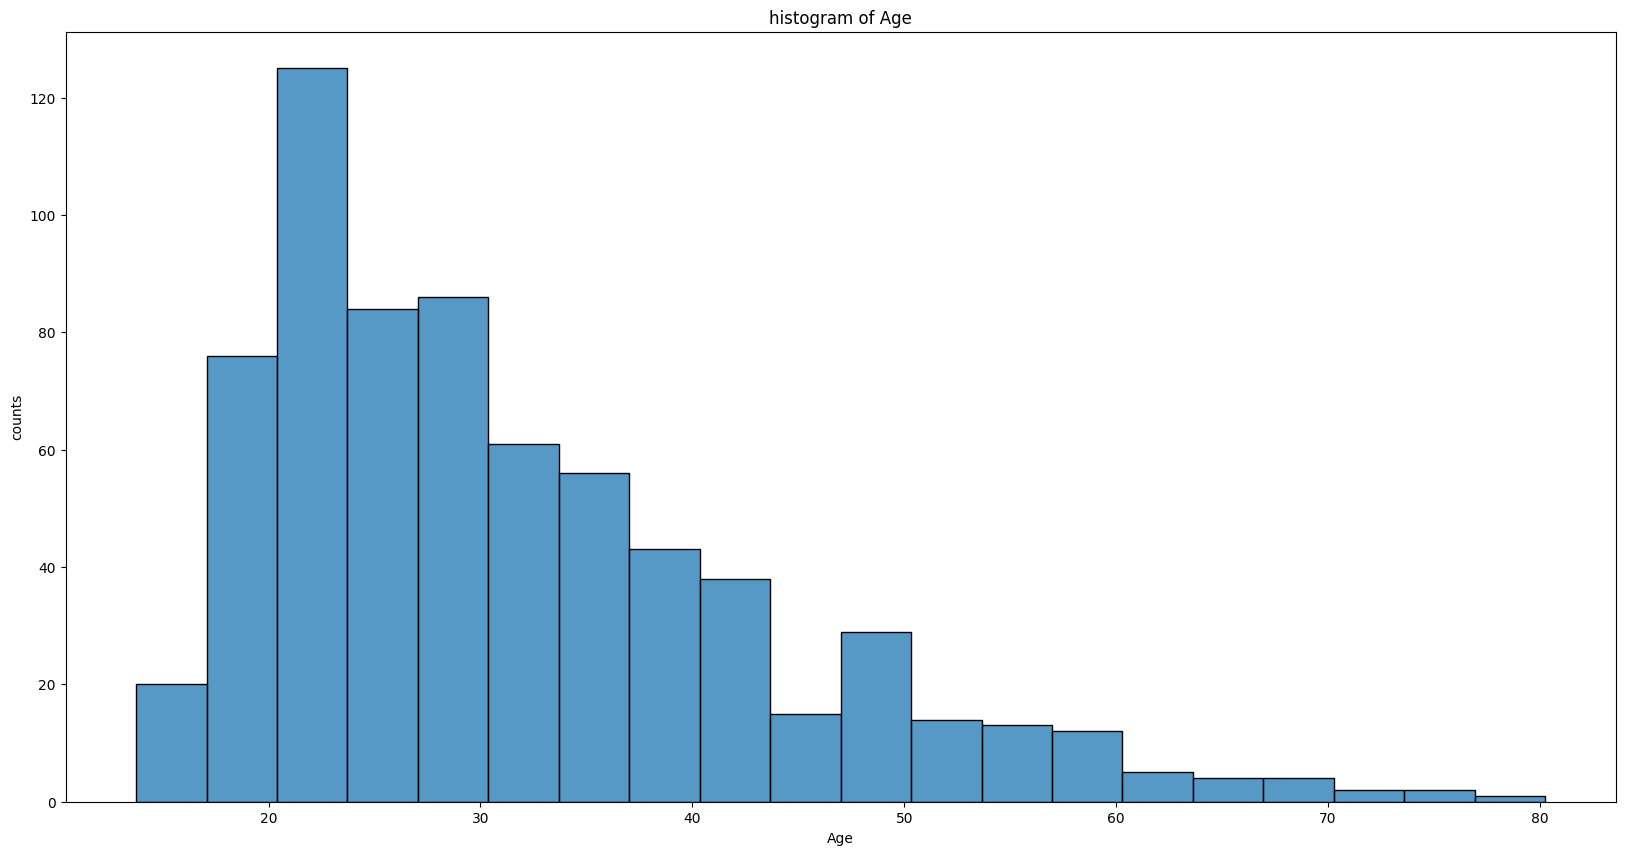

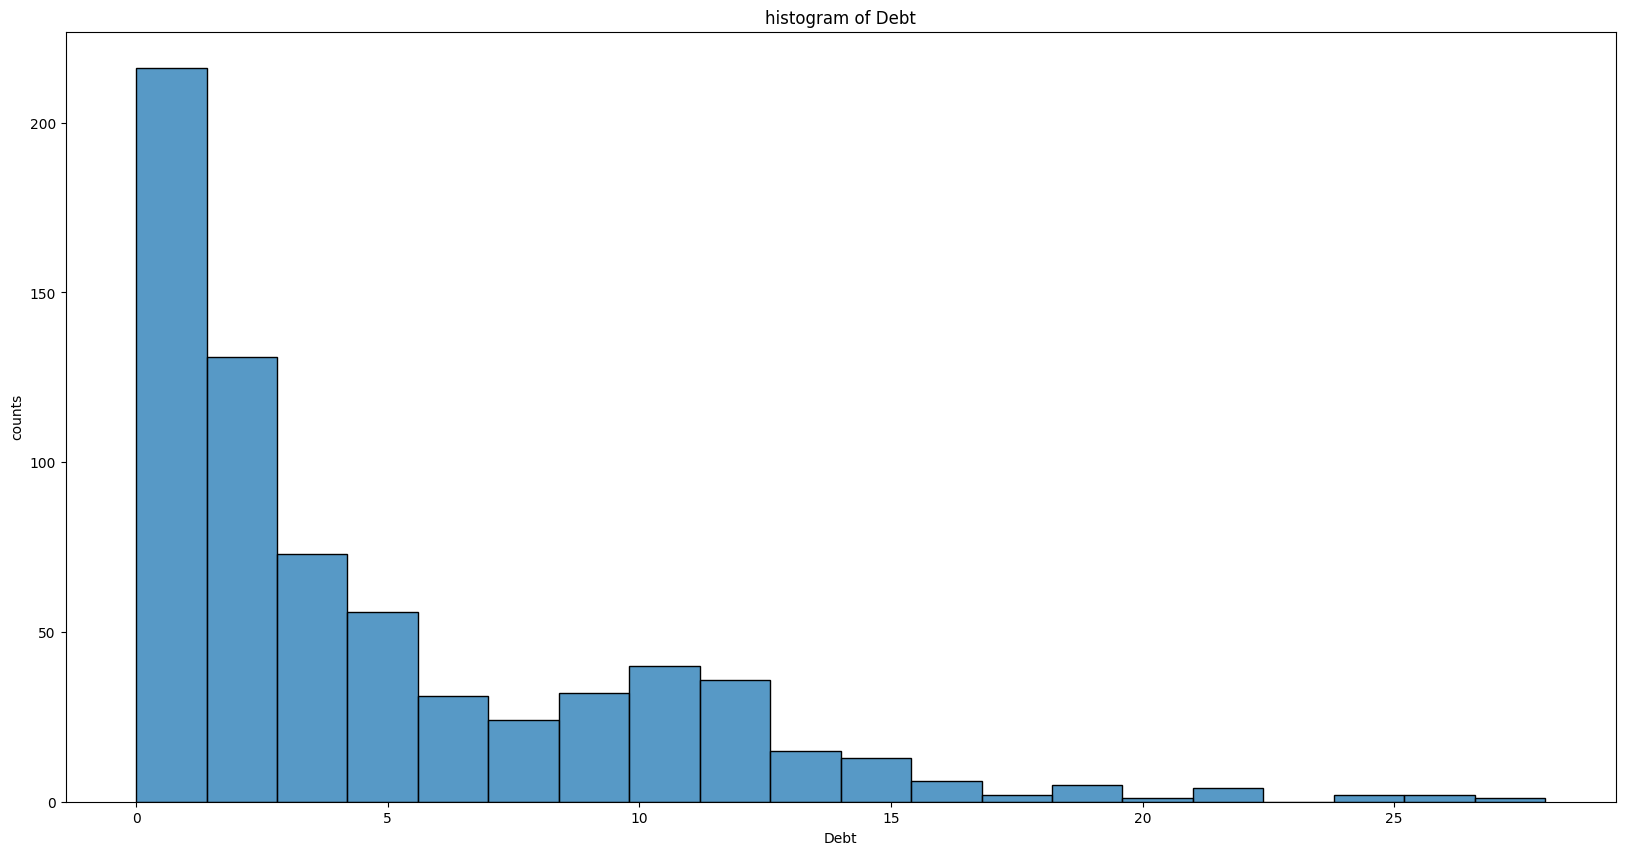

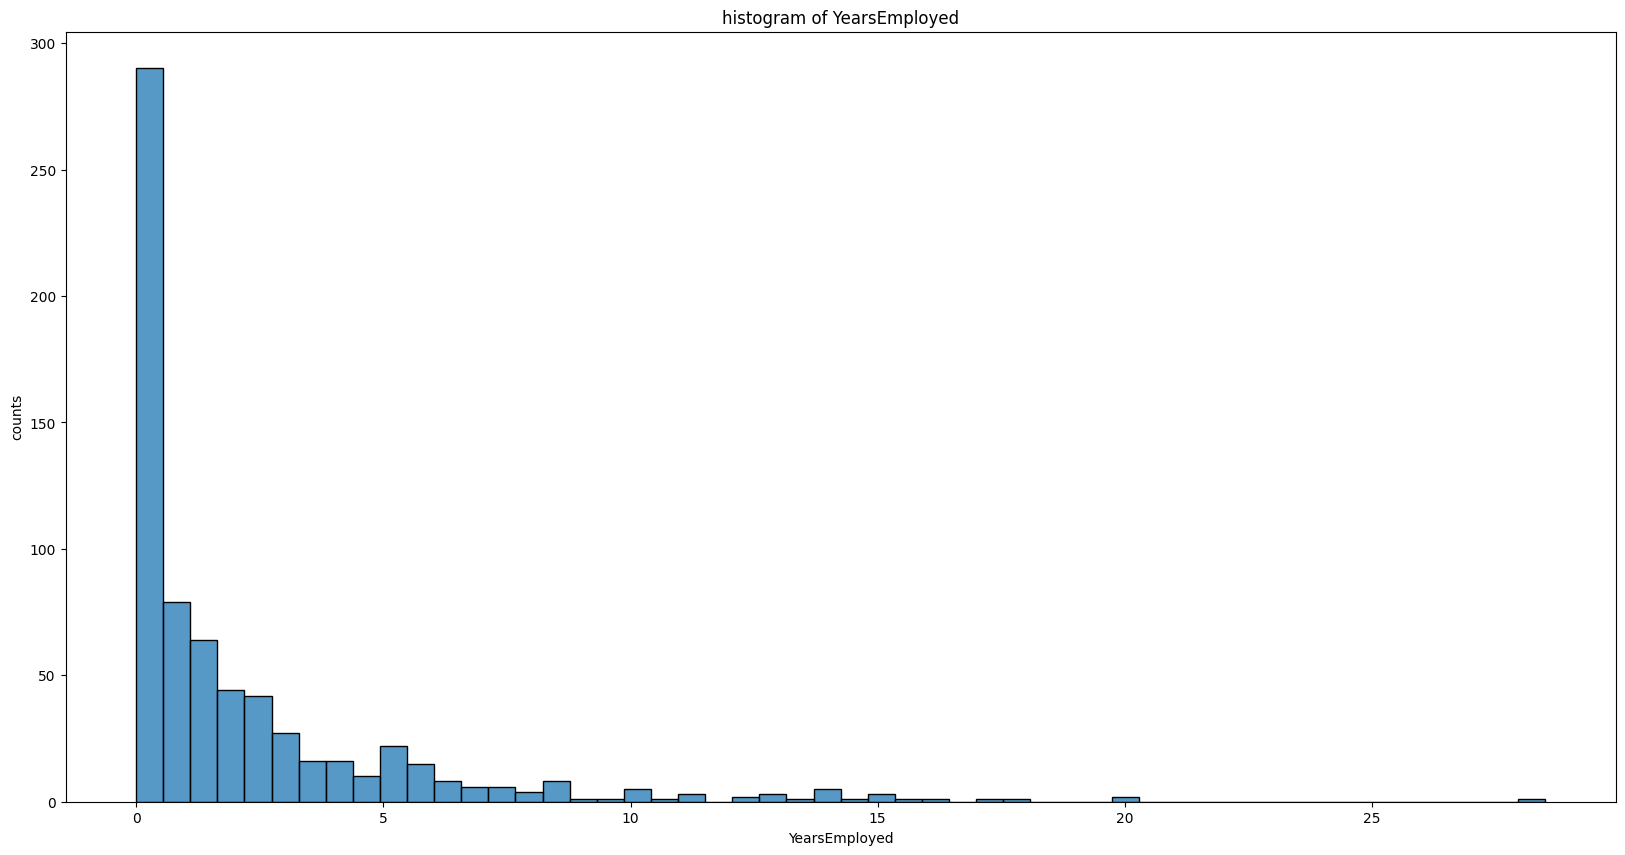

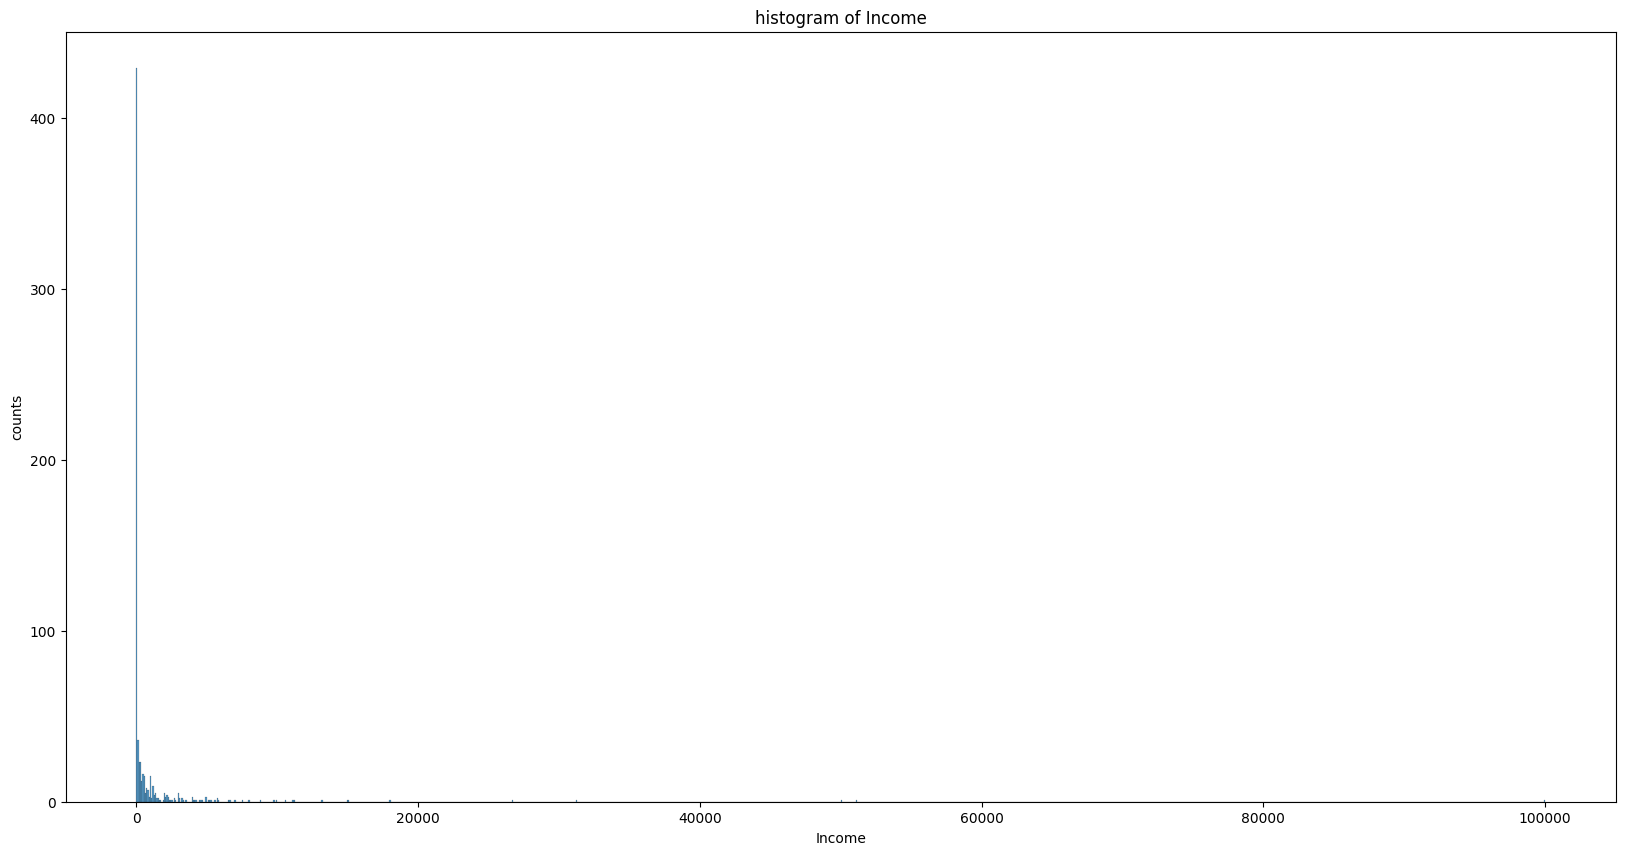

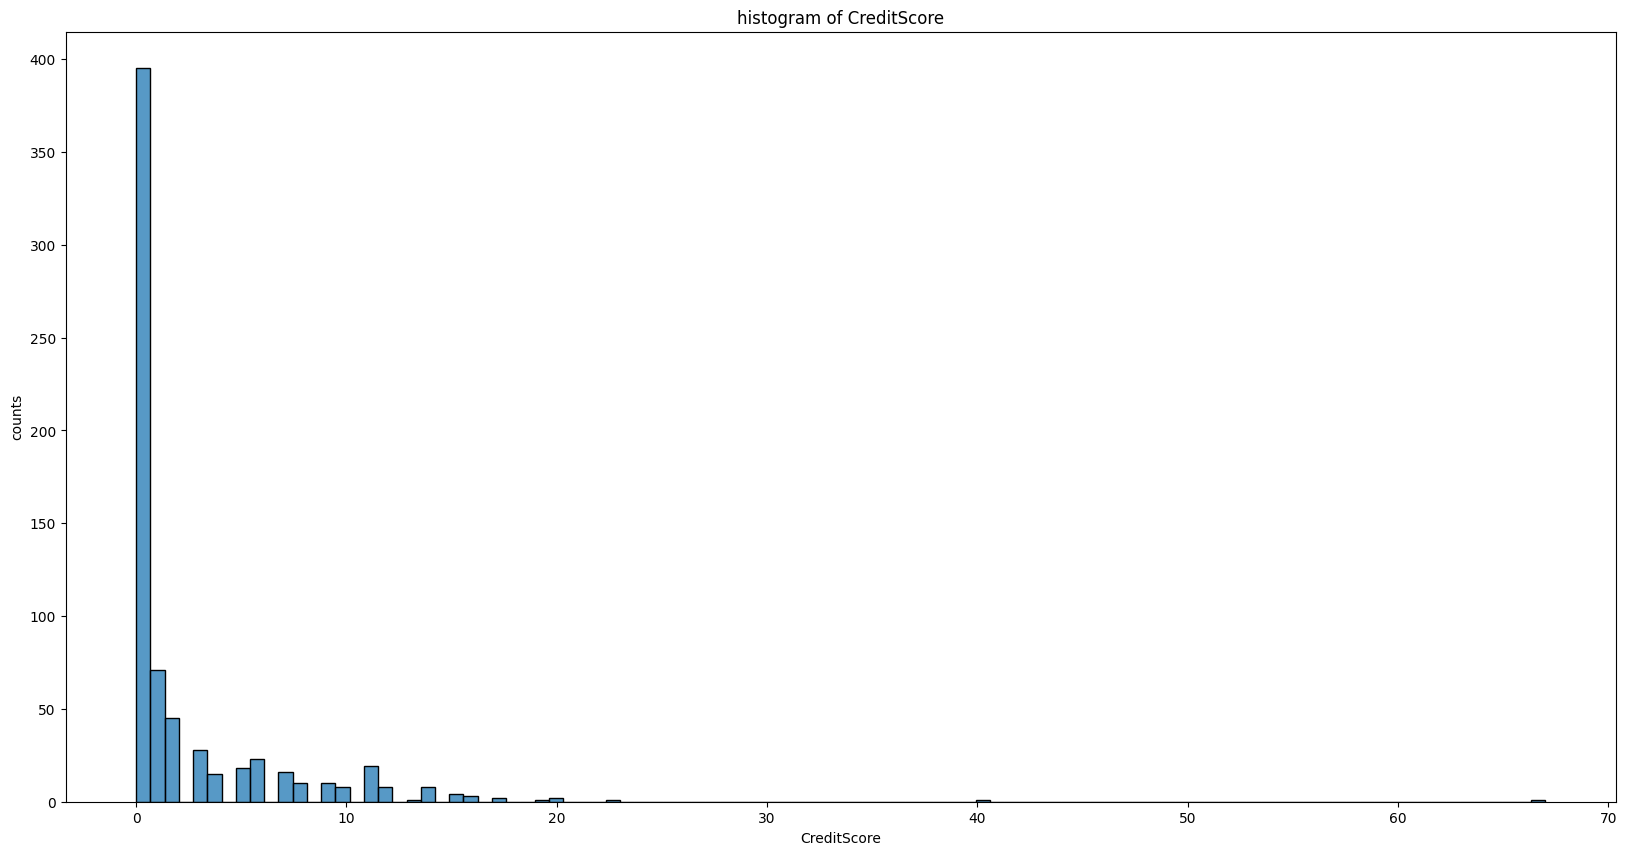

In [ ]:
# Plot Histogram
import seaborn as sns
import matplotlib.pyplot as plt

# [Age, Debt, YearsEmployed,Income,creditScore] are continious variranle columns
continious = ["Age", "Debt", "YearsEmployed", "Income", "CreditScore"]

for i in continious:
    plt.figure(figsize=(20,10))
    sns.histplot(df1[i])
    plt.xlabel(i)
    plt.ylabel('counts')
    plt.title('histogram of '+i)
    plt.show()

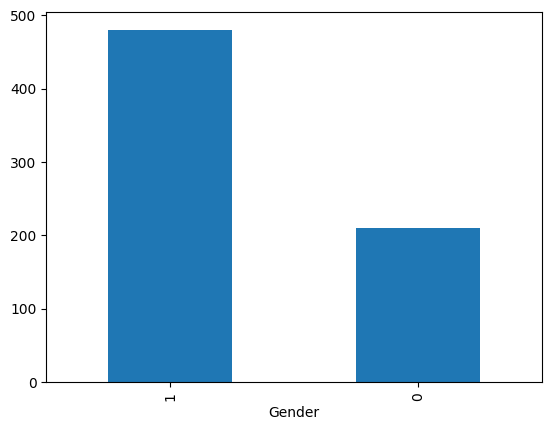

In [ ]:
import matplotlib.pyplot as plt

df1['Gender'].value_counts().plot(kind = 'bar')
plt.show()

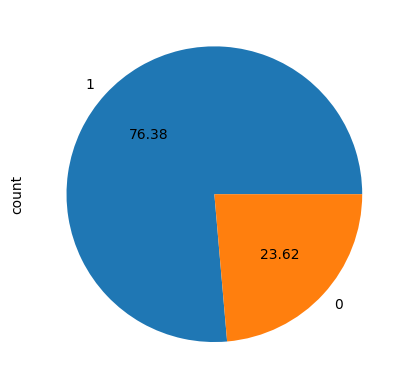

In [ ]:
df1['BankCustomer'].value_counts().plot(kind = 'pie', autopct='%.2f')
plt.show()

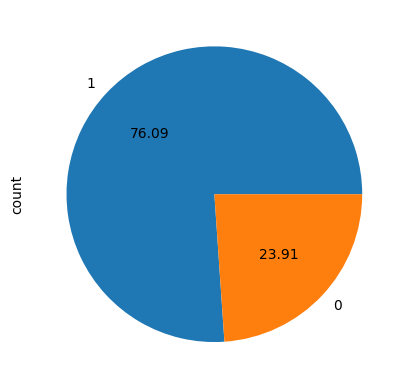

In [ ]:
df1['Married'].value_counts().plot(kind = 'pie', autopct='%.2f')
plt.show()

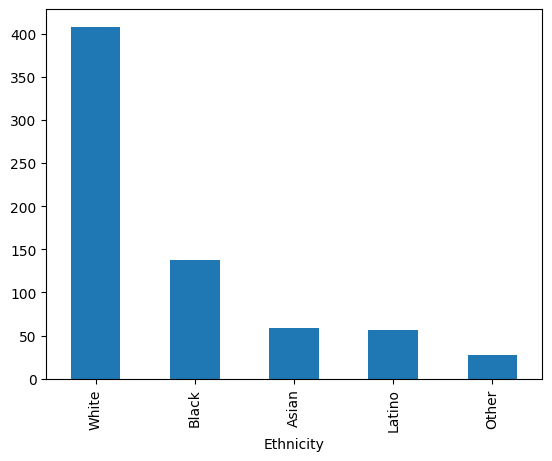

In [ ]:
df1['Ethnicity'].value_counts().plot(kind = 'bar')
plt.show()

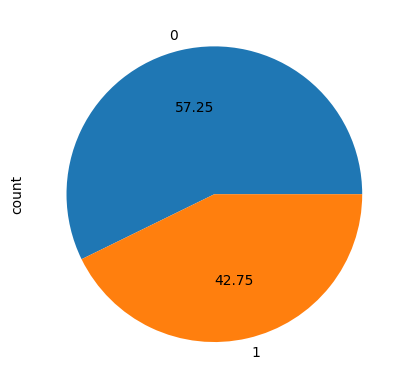

In [ ]:
df1['Employed'].value_counts().plot(kind = 'pie', autopct='%.2f')
plt.show()

## **Data pre-processing**

In [ ]:
# Encoding non-numerical columns into numerical

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

for column in df1.columns:
    if df1[column].dtype == 'object':
        df1[column] = label_encoder.fit_transform(df1[column])

In [ ]:
df1.head(5)

,Gender,Age,Debt,Married,BankCustomer,Industry,Industry_Name,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,StateName,Income,Approved
0,1,30.83,0.000,1,1,1,7,4,1.250,1,1,1,0,0,202,8,0,1
1,1,27.83,1.540,1,1,1,7,4,3.750,1,1,5,1,0,100,22,3,1
2,0,15.83,0.585,1,1,7,4,1,1.500,1,1,2,0,0,100,22,0,1
3,1,23.92,0.665,1,1,7,4,4,0.165,0,0,0,0,0,100,22,0,1
4,0,49.00,1.500,1,1,14,11,3,0.000,1,0,0,1,0,100,22,27,0


In [ ]:
df1.corr(method = 'pearson')

,Gender,Age,Debt,Married,BankCustomer,Industry,Industry_Name,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,StateName,Income,Approved
Gender,1.000000,0.035044,-0.041746,-0.068062,-0.071250,-0.089697,-0.111889,0.029492,0.086544,-0.026047,-0.077784,-0.024630,0.051674,0.075413,0.086007,0.049724,-0.002063,-0.028934
Age,0.035044,1.000000,0.202177,0.106929,0.099477,0.120104,-0.038746,-0.179534,0.391464,0.204434,0.086037,0.187327,0.053599,-0.006481,-0.078690,-0.107888,0.018719,0.164086
Debt,-0.041746,0.202177,1.000000,0.074649,0.083781,0.078030,0.064553,-0.075789,0.298902,0.244317,0.174846,0.271207,-0.013023,-0.116975,-0.217903,-0.141502,0.123121,0.206294
Married,-0.068062,0.106929,0.074649,1.000000,0.992033,-0.111277,0.021652,0.008226,0.069945,0.145073,0.175428,0.113968,-0.009784,0.024319,-0.017074,-0.075021,-0.006899,0.180583
BankCustomer,-0.071250,0.099477,0.083781,0.992033,1.000000,-0.108083,0.024677,0.006648,0.075905,0.138535,0.170268,0.111077,-0.002402,0.052141,-0.009513,-0.082177,0.057273,0.188964
Industry,-0.089697,0.120104,0.078030,-0.111277,-0.108083,1.000000,-0.232826,-0.190879,-0.074235,-0.161784,-0.143740,-0.079754,-0.097701,-0.027940,-0.067478,-0.071252,0.023707,-0.196453
Industry_Name,-0.111889,-0.038746,0.064553,0.021652,0.024677,-0.232826,1.000000,-0.013881,0.048689,0.154645,0.134769,0.080107,0.011010,-0.122211,0.020551,-0.032218,0.027820,0.202158
Ethnicity,0.029492,-0.179534,-0.075789,0.008226,0.006648,-0.190879,-0.013881,1.000000,-0.177111,-0.114148,-0.030250,-0.068072,-0.035688,0.070235,-0.040003,-0.008858,-0.034251,-0.075558
YearsEmployed,0.086544,0.391464,0.298902,0.069945,0.075905,-0.074235,0.048689,-0.177111,1.000000,0.345689,0.222982,0.322330,0.138139,-0.047522,-0.070495,-0.080999,0.051345,0.322475
PriorDefault,-0.026047,0.204434,0.244317,0.145073,0.138535,-0.161784,0.154645,-0.114148,0.345689,1.000000,0.432032,0.379532,0.091276,-0.145357,-0.055010,-0.020499,0.090012,0.720407


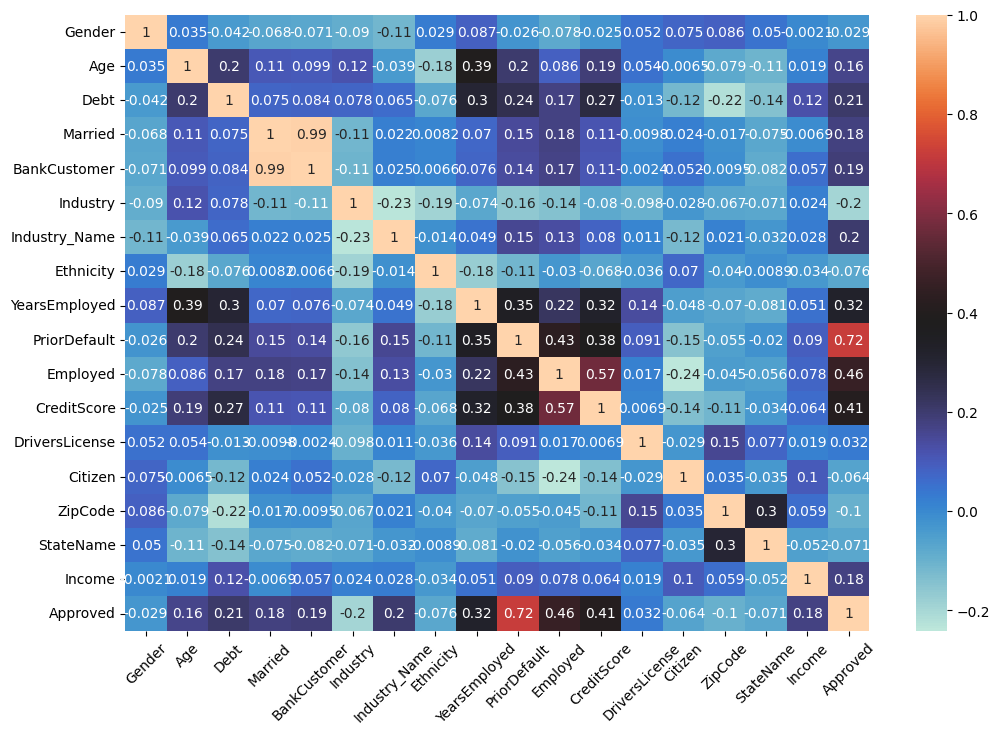

In [ ]:
plt.figure(figsize = (12, 8))
sns.heatmap(df1.corr(), annot=True, cmap="icefire")
plt.xticks(rotation = 45);

In [ ]:
def print_highly_correlated(df, features, threshold=0.5):
    corr_df = df[features].corr()
    correlated_features = np.where(np.abs(corr_df) > threshold)
    correlated_features = [(corr_df.iloc[x,y], x, y) for x, y in zip(*correlated_features) if x != y and x < y]
    s_corr_list = sorted(correlated_features, key=lambda x: -abs(x[0]))

    if s_corr_list == []:
        print("There are no highly correlated features with correlation above", threshold)
    else:
        for v, i, j in s_corr_list:
            cols = df[features].columns
            print ("%s and %s = %.3f" % (corr_df.index[i], corr_df.columns[j], v))

In [ ]:
print_highly_correlated(df1, df1.columns, 0.3)

Married and BankCustomer = 0.992
PriorDefault and Approved = 0.720
Employed and CreditScore = 0.571
Employed and Approved = 0.458
PriorDefault and Employed = 0.432
CreditScore and Approved = 0.406
Age and YearsEmployed = 0.391
PriorDefault and CreditScore = 0.380
YearsEmployed and PriorDefault = 0.346
YearsEmployed and Approved = 0.322
YearsEmployed and CreditScore = 0.322
ZipCode and StateName = 0.302


In [ ]:
import pandas as pd
from scipy import stats

# 1. โหลดข้อมูล (Load the dataset)
# สมมติว่าไฟล์ 'Dataset_Cleaned.csv' อยู่ใน Directory เดียวกัน
#df = pd.read_csv("Dataset_Cleaned.csv")

# 2. เตรียมข้อมูล (Data Preparation)
# แยกค่า CreditScore ออกเป็น 2 กลุ่ม ตามค่า Approved (1 และ 0)
creditscore_approved = df1[df1['Approved'] == 1]['CreditScore']
creditscore_not_approved = df1[df1['Approved'] == 0]['CreditScore']

# 3. ทำ Independent Samples T-test
# ใช้ stats.ttest_ind สำหรับการทดสอบทีแบบอิสระ
# ตั้ง equal_var=False เพื่อใช้ Welch's t-test ซึ่งไม่สมมติว่าความแปรปรวนเท่ากัน
t_stat, p_value = stats.ttest_ind(
    creditscore_approved,
    creditscore_not_approved,
    equal_var=False
)

# 4. แสดงผลลัพธ์ (Display Results)
print(f"ค่าเฉลี่ย CreditScore กลุ่ม Approved (1): {creditscore_approved.mean():.4f}")
print(f"ค่าเฉลี่ย CreditScore กลุ่ม Not Approved (0): {creditscore_not_approved.mean():.4f}")
print("-" * 30)
print(f"ค่า T-statistic: {t_stat:.4f}")
print(f"ค่า P-value: {p_value:.4f}")

# การแปลผล:
if p_value < 0.05:
    print("P-value < 0.05: ปฏิเสธ H0 สรุปได้ว่า CreditScore เฉลี่ยแตกต่างกันอย่างมีนัยสำคัญ")
else:
    print("P-value >= 0.05: ยอมรับ H0 สรุปว่า CreditScore เฉลี่ยไม่แตกต่างกันอย่างมีนัยสำคัญ")

ค่าเฉลี่ย CreditScore กลุ่ม Approved (1): 4.6059
ค่าเฉลี่ย CreditScore กลุ่ม Not Approved (0): 0.6319
------------------------------
ค่า T-statistic: 10.6384
ค่า P-value: 0.0000
P-value < 0.05: ปฏิเสธ H0 สรุปได้ว่า CreditScore เฉลี่ยแตกต่างกันอย่างมีนัยสำคัญ


In [ ]:
x = df1.drop('Approved', axis = 1)
y = df1['Approved']

In [ ]:
print(x.shape)
x.head()

(690, 17)


,Gender,Age,Debt,Married,BankCustomer,Industry,Industry_Name,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,StateName,Income
0,1,30.83,0.000,1,1,1,7,4,1.250,1,1,1,0,0,202,8,0
1,1,27.83,1.540,1,1,1,7,4,3.750,1,1,5,1,0,100,22,3
2,0,15.83,0.585,1,1,7,4,1,1.500,1,1,2,0,0,100,22,0
3,1,23.92,0.665,1,1,7,4,4,0.165,0,0,0,0,0,100,22,0
4,0,49.00,1.500,1,1,14,11,3,0.000,1,0,0,1,0,100,22,27


In [ ]:
print(y.shape)
y.head()

(690,)


,Approved
0,1
1,1
2,1
3,1
4,0


In [ ]:
# train_test_split จากไลบรารี scikit-learn เพื่อแบ่งข้อมูลทั้งหมด (x คือฟีเจอร์, y คือตัวแปรเป้าหมาย) ออกเป็น 4 ส่วน สำหรับใช้ในกระบวนการฝึกฝนและประเมินผลโมเดลแมชชีนเลิร์นนิง

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
# ทำให้ชุดข้อมูลการฝึก (x_train) และชุดข้อมูลการทดสอบ (x_test) มีมาตราส่วนเดียวกัน (Scale)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## **Build Machine Learning Model**

Model name: Logistic Regression

In [ ]:
# Build Machine Learning Model - Model name: Logistic Regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state = 0)
log_reg.fit(x_train, y_train)


LogisticRegression(random_state=0)

In [ ]:
y_pred = log_reg.predict(x_test)
print("Train Score: {:.5f}".format(log_reg.score(x_train, y_train)))
print("Test Score: {:.5f}".format(log_reg.score(x_test, y_test)))

Train Score: 0.87041
Test Score: 0.86705


In [ ]:
# โมเดล Logistic Regression กำหนดค่าพารามิเตอร์ C = 0.1 เป็นความผกผันของค่าความแรงของการปรับให้เป็นระเบียบ (Regularization)
# กำหนดประเภทของ Regularization เป็น L1 Regularization L1 Regularization มักเรียกว่า Lasso
# กำหนดอัลกอริทึมที่ใช้ในการหาค่าที่ดีที่สุด (Optimization Algorithm)

log_reg1 = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', random_state = 0)
log_reg1.fit(x_train, y_train)


LogisticRegression(C=0.1, penalty='l1', random_state=0, solver='liblinear')

In [ ]:
y_pred1 = log_reg1.predict(x_test)
print("Train Score: {:.5f}".format(log_reg1.score(x_train, y_train)))
print("Test Score: {:.5f}".format(log_reg1.score(x_test, y_test)))

Train Score: 0.85880
Test Score: 0.84971


In [ ]:
# กำหนดพารามิเตอร์
paragrid = { 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty':['l1', 'l2'], 'solver':['liblinear']}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(LogisticRegression(), param_grid=paragrid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)

# ดูพารามิเตอร์ที่ดีที่สุด
print("Best Parameters:", grid_search.best_params_)
# คะแนนความแม่นยำ (Accuracy Score) เฉลี่ยสูงสุด ที่ได้จากการประเมินโมเดลในกระบวนการ Cross-Validation (CV)
print("Best Score:{:.5f}".format(grid_search.best_score_))

# คะแนนความแม่นยำ (Accuracy Score) ที่ได้จากการประเมินโมเดลสุดท้าย (โมเดลที่ดีที่สุดจากการทำ Grid Search) บนชุดข้อมูล x_train ทั้งหมด
print("Grid Search - Train Score: {:.5f}".format(grid_search.score(x_train, y_train)))
print("Grid Search - Test Score: {:.5f}".format(grid_search.score(x_test, y_test)))


Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score:0.87018
Grid Search - Train Score: 0.87621
Grid Search - Test Score: 0.87861


In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
# from sklearn.feature_selection import SelectKBest # สามารถเพิ่มขั้นตอนการเลือก Feature ได้

# *** สมมติว่า x_train, y_train, x_test, y_test ถูกเตรียมไว้แล้ว ***

# 1. กำหนดขั้นตอนใน Pipeline
# ----------------------------------------------------------------
# สำหรับตัวอย่างนี้ เราใช้แค่ StandardScaler และ LogisticRegression
steps = [
    ('scaler', StandardScaler()),  # ขั้นตอนที่ 1: Data Preprocessing (Standardization)
    ('model', LogisticRegression(random_state=16)) # ขั้นตอนที่ 2: Model (Logistic Regression)
]

pipeline = Pipeline(steps)
# ----------------------------------------------------------------

# 2. กำหนด Hyperparameters สำหรับ Grid Search ในรูปแบบ Pipeline
# ----------------------------------------------------------------
# ชื่อพารามิเตอร์ต้องขึ้นต้นด้วยชื่อขั้นตอนใน Pipeline (เช่น 'model__C')
paragrid = {
    'model__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'model__penalty':['l1', 'l2'],
    'model__solver':['liblinear']
}
# ----------------------------------------------------------------

# 3. สร้าง Grid Search และทำการฝึกฝน (Fit)
grid_search = GridSearchCV(
    pipeline,          # ใช้ Pipeline แทนโมเดลเปล่า
    param_grid=paragrid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1          # ใช้ทุก Core เพื่อเร่งความเร็ว
)

grid_search.fit(x_train, y_train)

# 4. แสดงผลลัพธ์
print("Best Parameters:", grid_search.best_params_)
print(f"Best Score: {grid_search.best_score_:.5f}")

# ตรวจสอบประสิทธิภาพบนชุดข้อมูลจริง
print(f"Grid Search - Train Score: {grid_search.score(x_train, y_train):.5f}")
print(f"Grid Search - Test Score: {grid_search.score(x_test, y_test):.5f}")

Best Parameters: {'model__C': 10, 'model__penalty': 'l1', 'model__solver': 'liblinear'}
Best Score: 0.87018
Grid Search - Train Score: 0.87427
Grid Search - Test Score: 0.87861


In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 1. กำหนดขั้นตอนใน Pipeline
# ----------------------------------------------------------------
# ใช้ StandardScaler และ LogisticRegression
steps = [
    ('scaler', StandardScaler()),  # ขั้นตอนที่ 1: Data Preprocessing (Standardization)
    ('model', LogisticRegression(random_state=0)) # ขั้นตอนที่ 2: Model (Logistic Regression)
]

pipeline = Pipeline(steps)
# ----------------------------------------------------------------

# 2. กำหนด Hyperparameters สำหรับ Grid Search ในรูปแบบ Pipeline
# ----------------------------------------------------------------
# กำหนดชื่อพารามิเตอร์ใน Pipeline
paragrid = {
    'model__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'model__penalty':['l1', 'l2'],
    'model__solver':['liblinear']
}
# ----------------------------------------------------------------

# 3. สร้าง Grid Search และทำการฝึกฝน (Fit)
grid_search = GridSearchCV(
    pipeline,          # ใช้ Pipeline
    param_grid=paragrid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

# 4. แสดงผลลัพธ์
print("Best Parameters:", grid_search.best_params_)
print(f"Best Score: {grid_search.best_score_:.5f}")

# ตรวจสอบประสิทธิภาพบนชุดข้อมูลจริง
print(f"Grid Search - Train Score: {grid_search.score(x_train, y_train):.5f}")
print(f"Grid Search - Test Score: {grid_search.score(x_test, y_test):.5f}")

Best Parameters: {'model__C': 10, 'model__penalty': 'l1', 'model__solver': 'liblinear'}
Best Score: 0.87018
Grid Search - Train Score: 0.87427
Grid Search - Test Score: 0.87861


In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 1. กำหนดขั้นตอนใน Pipeline (เหมือนเดิม)
steps = [
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(random_state=0))
]
pipeline = Pipeline(steps)

# 2. กำหนด Hyperparameters สำหรับ Grid Search (เหมือนเดิม)
paragrid = {
    'model__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'model__penalty':['l1', 'l2'],
    'model__solver':['liblinear']
}

# 3. กำหนดรายการค่า CV ที่ต้องการทดสอบ
cv_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# 4. วนลูปเพื่อรัน GridSearchCV สำหรับแต่ละค่า CV
# ----------------------------------------------------------------
best_results = []

for cv_val in cv_values:
    print(f"\n--- Running GridSearchCV with cv = {cv_val} ---")

    # สร้าง Grid Search สำหรับค่า cv_val นั้นๆ
    grid_search = GridSearchCV(
        pipeline,
        param_grid=paragrid,
        cv=cv_val,  # เปลี่ยนค่า cv ตามลูป
        scoring='accuracy',
        n_jobs=-1
    )

    # ฝึกฝนและค้นหาพารามิเตอร์ที่ดีที่สุดสำหรับ cv_val นี้
    grid_search.fit(x_train, y_train)

    # เก็บผลลัพธ์ที่ดีที่สุดของรอบนี้
    best_results.append({
        'cv': cv_val,
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
        'train_score': grid_search.score(x_train, y_train),
        'test_score': grid_search.score(x_test, y_test)
    })

    # แสดงผลลัพธ์ย่อย
    print(f"Best Parameters (cv={cv_val}):", grid_search.best_params_)
    print(f"Best Score (cv={cv_val}): {grid_search.best_score_:.5f}")

# 5. แสดงผลลัพธ์สรุปทั้งหมด
# ----------------------------------------------------------------
print("\n========================================================")
print("สรุปผลลัพธ์การค้นหา CV ทั้งหมด")
print("========================================================")

summary_df = pd.DataFrame(best_results)
print(summary_df[['cv', 'best_score', 'best_params', 'test_score']])

# ตัวอย่างการหาค่า cv ที่ให้ Test Score สูงสุด
best_overall = summary_df.loc[summary_df['test_score'].idxmax()]
print("\n*** Overall Best Result (Based on Test Score) ***")
print(f"Optimal CV Value: {best_overall['cv']}")
print(f"Best Hyperparameters: {best_overall['best_params']}")
print(f"Highest Test Score: {best_overall['test_score']:.5f}")


--- Running GridSearchCV with cv = 2 ---
Best Parameters (cv=2): {'model__C': 0.1, 'model__penalty': 'l2', 'model__solver': 'liblinear'}
Best Score (cv=2): 0.88388

--- Running GridSearchCV with cv = 3 ---
Best Parameters (cv=3): {'model__C': 0.1, 'model__penalty': 'l2', 'model__solver': 'liblinear'}
Best Score (cv=3): 0.87420

--- Running GridSearchCV with cv = 4 ---
Best Parameters (cv=4): {'model__C': 1, 'model__penalty': 'l1', 'model__solver': 'liblinear'}
Best Score (cv=4): 0.87036

--- Running GridSearchCV with cv = 5 ---
Best Parameters (cv=5): {'model__C': 10, 'model__penalty': 'l1', 'model__solver': 'liblinear'}
Best Score (cv=5): 0.87018

--- Running GridSearchCV with cv = 6 ---
Best Parameters (cv=6): {'model__C': 0.1, 'model__penalty': 'l2', 'model__solver': 'liblinear'}
Best Score (cv=6): 0.86646

--- Running GridSearchCV with cv = 7 ---
Best Parameters (cv=7): {'model__C': 0.01, 'model__penalty': 'l2', 'model__solver': 'liblinear'}
Best Score (cv=7): 0.87026

--- Running

Evaluate Model

In [ ]:
# โมเดล Logistic Regression กำหนดค่าพารามิเตอร์ C = 0.1 เป็นความผกผันของค่าความแรงของการปรับให้เป็นระเบียบ (Regularization)
# กำหนดประเภทของ Regularization เป็น L1 Regularization L1 Regularization มักเรียกว่า Lasso
# กำหนดอัลกอริทึมที่ใช้ในการหาค่าที่ดีที่สุด (Optimization Algorithm)

log_reg_opt = LogisticRegression(C=10, penalty='l1', solver='liblinear', random_state = 0)
log_reg_opt.fit(x_train, y_train)


LogisticRegression(C=10, penalty='l1', random_state=0, solver='liblinear')

In [ ]:

print("Train Score: {:.5f}".format(log_reg_opt.score(x_train, y_train)))
print("Test Score: {:.5f}".format(log_reg_opt.score(x_test, y_test)))

y_pred = log_reg_opt.predict(x_test)
#print(y_pred)

Train Score: 0.87427
Test Score: 0.87861


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# สร้าง Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89        98
           1       0.82      0.92      0.87        75

    accuracy                           0.88       173
   macro avg       0.88      0.88      0.88       173
weighted avg       0.88      0.88      0.88       173



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# 1. โมเดลที่ดีที่สุดจาก Grid Search
best_model = grid_search.best_estimator_

# ใช้ get_params() เพื่อดู Hyperparameters ทั้งหมดของโมเดล
print("Hyperparameters ทั้งหมดของโมเดลที่ดีที่สุด:")
print(best_model.get_params())

# 2. ทำนายผลบนชุดข้อมูลทดสอบ
y_pred = best_model.predict(x_test)

# 3. สร้าง Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# 4. แสดง Classification Report
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

Hyperparameters ทั้งหมดของโมเดลที่ดีที่สุด:
{'memory': None, 'steps': [('scaler', StandardScaler()), ('model', LogisticRegression(C=10, penalty='l1', random_state=0, solver='liblinear'))], 'transform_input': None, 'verbose': False, 'scaler': StandardScaler(), 'model': LogisticRegression(C=10, penalty='l1', random_state=0, solver='liblinear'), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'model__C': 10, 'model__class_weight': None, 'model__dual': False, 'model__fit_intercept': True, 'model__intercept_scaling': 1, 'model__l1_ratio': None, 'model__max_iter': 100, 'model__multi_class': 'deprecated', 'model__n_jobs': None, 'model__penalty': 'l1', 'model__random_state': 0, 'model__solver': 'liblinear', 'model__tol': 0.0001, 'model__verbose': 0, 'model__warm_start': False}

Confusion Matrix:
 [[83 15]
 [ 6 69]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.85      0.89        98
           1       0

In [ ]:
df1.head(5)

,Gender,Age,Debt,Married,BankCustomer,Industry,Industry_Name,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,StateName,Income,Approved
0,1,30.83,0.000,1,1,1,7,4,1.250,1,1,1,0,0,202,8,0,1
1,1,27.83,1.540,1,1,1,7,4,3.750,1,1,5,1,0,100,22,3,1
2,0,15.83,0.585,1,1,7,4,1,1.500,1,1,2,0,0,100,22,0,1
3,1,23.92,0.665,1,1,7,4,4,0.165,0,0,0,0,0,100,22,0,1
4,0,49.00,1.500,1,1,14,11,3,0.000,1,0,0,1,0,100,22,27,0


## **Summary**

ผลลัพธ์จากโมเดลการพยากรณ์นี้แสดงให้เห็นว่าโมเดลมีความสามารถในการจำแนกผู้ขอสินเชื่อบัตรเครดิตได้อย่างแม่นยำและสมดุล โดยมี Accuracy รวมอยู่ที่ 88% จาก 173 ตัวอย่างในชุดทดสอบ ซึ่งสูงกว่าเกณฑ์ที่ยอมรับได้สำหรับงานจำแนกประเภท